In [ ]:
import pyshark

cap = pyshark.FileCapture('../data/pre_process/trace_clean/benign.pcap')
for packet in cap :
    if "HTTP2" in packet:
        print(packet._all_fields)
        break

c:\Users\thoger\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyshark\capture\capture.py:177: UserWarning: The running eventloop has tasks but pyshark must set a new eventloop to continue. Existing tasks may not run.
  warnings.warn("The running eventloop has tasks but pyshark must set a new eventloop to continue. "


RuntimeError: Cannot run the event loop while another loop is running

In [10]:
import json

with open("../data/pre_process/trace_dissection/benign.json") as f:
    e = json.load(f)

absent_count = 0
for node in e:
    if "is_attack" not in node["common"]: absent_count += 1

absent_count

0

3500 (avec id) vs 320 (sans id)

In [6]:
import pandas as pd

stat_prev_df = pd.read_csv('./stat/benign_original (1).csv')

In [ ]:
stat_prev_df = stat_prev_df[stat_prev_df["filename"] != "benign_original (6).pcap"]

In [8]:
stat_prev_df["filename"].unique()

array(['benign_original (1).pcap'], dtype=object)

In [14]:
stat_prev_df

,filename,ts,id,ip_src,ip_dst,is_attack,http2,pfcp,gtp,ngap,nas,type
0,benign_original (1).pcap,1.751834e+09,4,10.100.200.14,10.100.200.16,0,False,False,False,True,False,register_random_ue
1,benign_original (1).pcap,1.751834e+09,5,10.100.200.16,10.100.200.4,0,False,False,False,False,False,register_random_ue
2,benign_original (1).pcap,1.751834e+09,6,10.100.200.4,10.100.200.16,0,False,False,False,False,False,register_random_ue
3,benign_original (1).pcap,1.751834e+09,7,10.100.200.16,10.100.200.4,0,False,False,False,False,False,register_random_ue
4,benign_original (1).pcap,1.751834e+09,8,10.100.200.16,10.100.200.4,0,True,False,False,False,False,register_random_ue
...,...,...,...,...,...,...,...,...,...,...,...,...
673804,benign_original (1).pcap,1.751839e+09,684033,10.100.200.4,10.100.200.8,0,True,False,False,False,False,user_traffic
673805,benign_original (1).pcap,1.751839e+09,684034,10.100.200.8,10.100.200.4,0,False,False,False,False,False,user_traffic
673806,benign_original (1).pcap,1.751839e+09,684035,10.100.200.4,10.100.200.8,0,True,False,False,False,False,user_traffic
673807,benign_original (1).pcap,1.751839e+09,684036,10.100.200.8,10.100.200.13,0,True,False,False,False,False,user_traffic


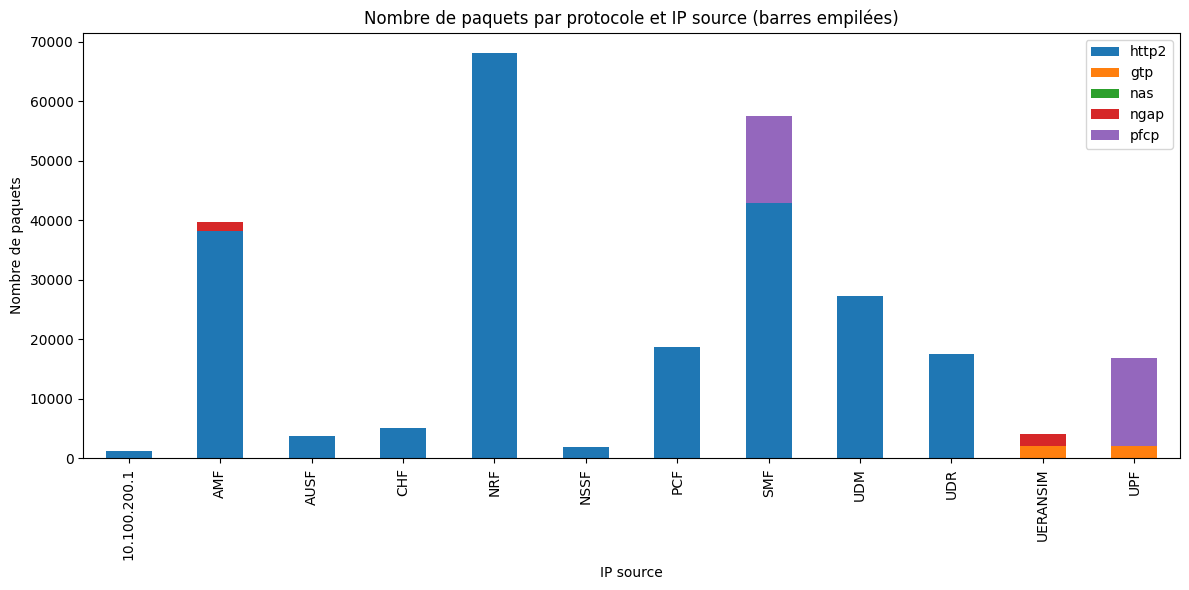

In [17]:
import matplotlib.pyplot as plt
import yaml

with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']
grouped = stat_prev_df.groupby('ip_src')[protocols].sum()

filtered = grouped[(grouped[protocols] != 0).any(axis=1)]
filtered.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Nombre de paquets')
plt.xlabel('IP source')
plt.title('Nombre de paquets par protocole et IP source (barres empilées)')
plt.tight_layout()
plt.show()


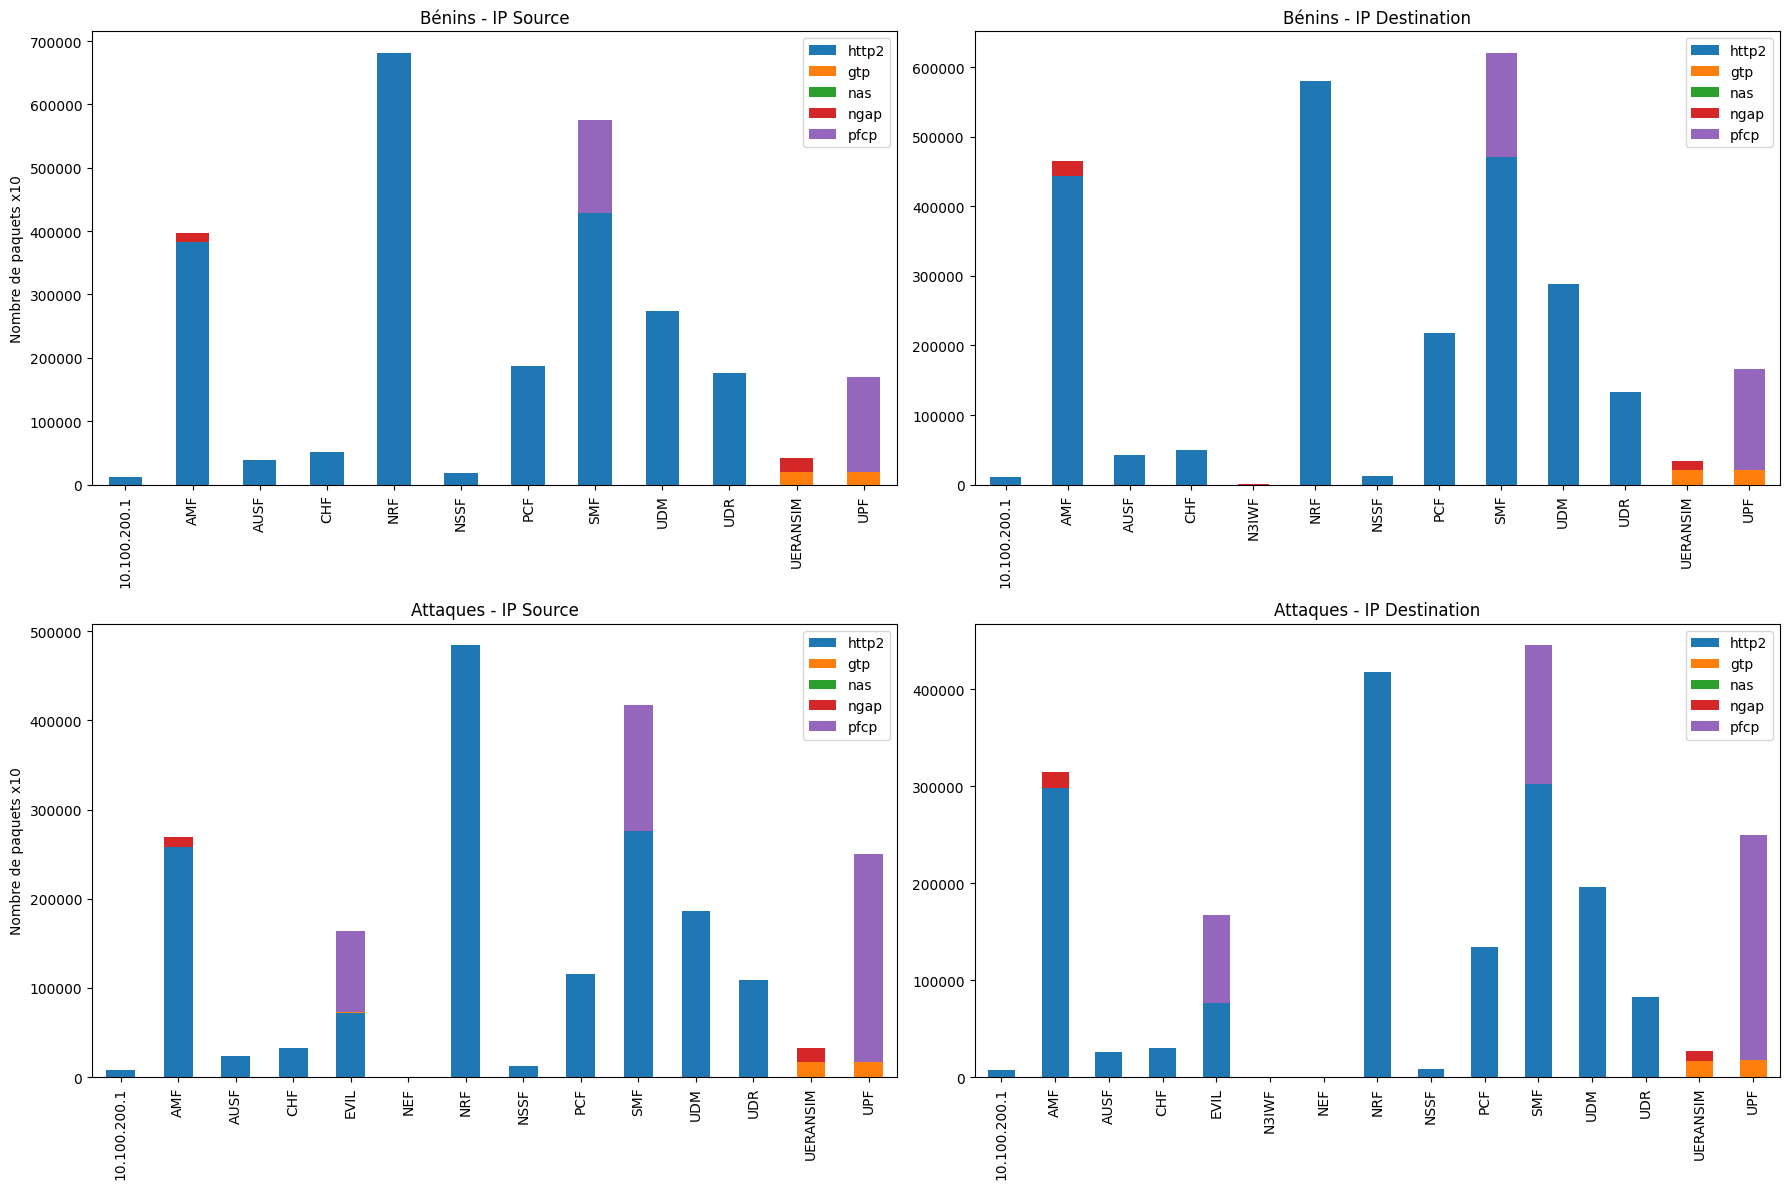

In [47]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd

# Charger les CSV
benign_df = pd.read_csv('./stat/benign_original (1).csv')
attack_df = pd.read_csv('./stat/both_original (1).csv')

# Charger et inverser le dictionnaire YAML
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
for df in [benign_df, attack_df]:
    df["ip_src"] = df["ip_src"].map(addr_dict).fillna(df["ip_src"])
    df["ip_dst"] = df["ip_dst"].map(addr_dict).fillna(df["ip_dst"])

protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Fonction pour grouper et multiplier par 10
def prepare_grouped(df, column):
    grouped = df.groupby(column)[protocols].sum() * 10
    filtered = grouped[(grouped[protocols] != 0).any(axis=1)]
    return filtered

# Préparer les 4 tableaux
benign_src = prepare_grouped(benign_df, "ip_src")
benign_dst = prepare_grouped(benign_df, "ip_dst")
attack_src = prepare_grouped(attack_df, "ip_src")
attack_dst = prepare_grouped(attack_df, "ip_dst")

# Créer la figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top-left : ip_src benign
benign_src.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title("Bénins - IP Source")
axes[0, 0].set_ylabel("Nombre de paquets x10")
axes[0, 0].set_xlabel("")

# Top-right : ip_dst benign
benign_dst.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title("Bénins - IP Destination")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")

# Bottom-left : ip_src attaques
attack_src.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title("Attaques - IP Source")
axes[1, 0].set_ylabel("Nombre de paquets x10")
axes[1, 0].set_xlabel("")

# Bottom-right : ip_dst attaques
attack_dst.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title("Attaques - IP Destination")
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("")

plt.tight_layout()
plt.show()


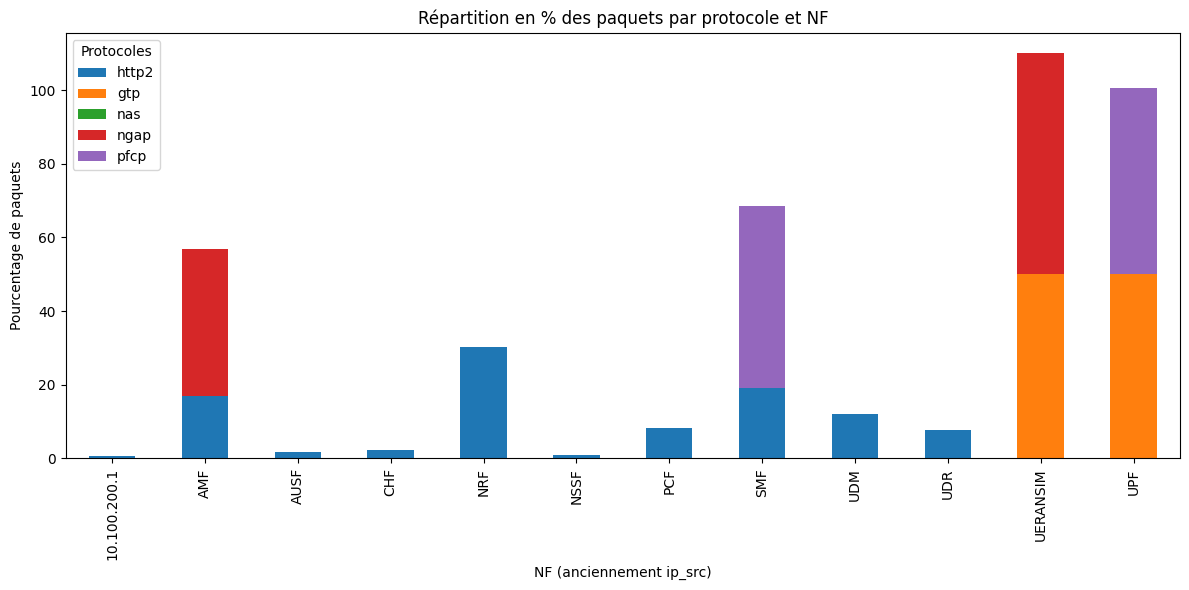

In [18]:
import matplotlib.pyplot as plt
import yaml

# Charger dictionnaire et inverser clé/valeur
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

# Protocoles
protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Regrouper par ip_src et sommer
grouped = stat_prev_df.groupby('ip_src')[protocols].sum()

# Garder uniquement les NFs qui ont au moins 1 paquet
filtered = grouped[(grouped[protocols] != 0).any(axis=1)]

# Normaliser par protocole → colonnes = % de chaque protocole reçu par chaque ip_src
percentages = filtered.div(filtered.sum(axis=0), axis=1) * 100

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Pourcentage de paquets')
plt.xlabel('NF (anciennement ip_src)')
plt.title('Répartition en % des paquets par protocole et NF')
plt.legend(title="Protocoles")
plt.tight_layout()
plt.show()


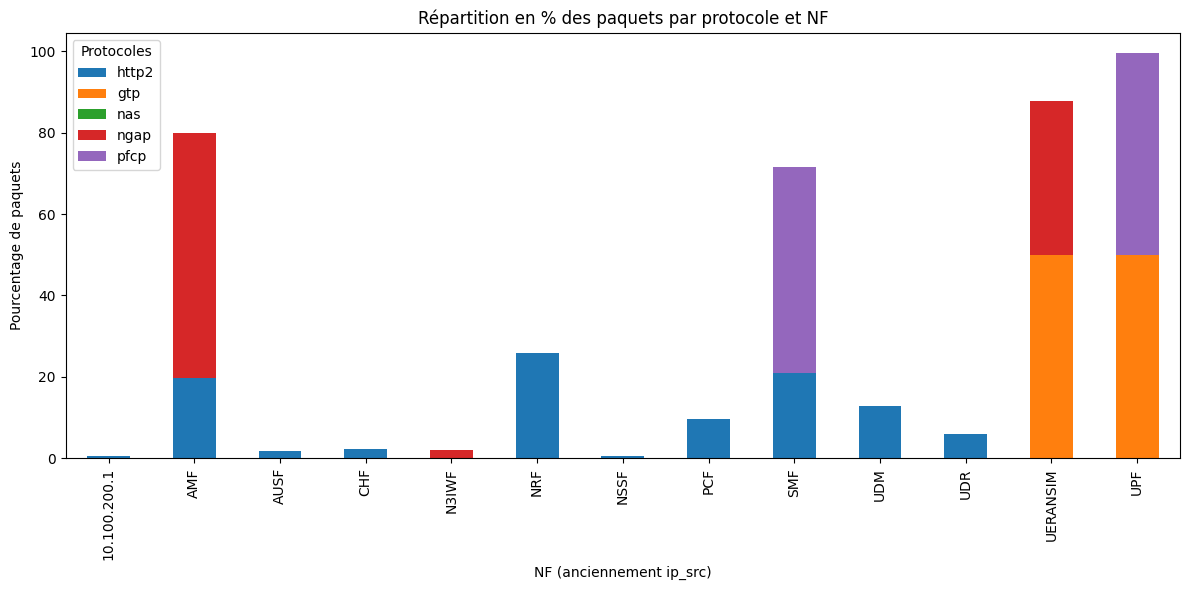

In [19]:
import matplotlib.pyplot as plt
import yaml

# Charger dictionnaire et inverser clé/valeur
with open('./addresses.yaml') as f:
    addr_dict = yaml.safe_load(f)
    addr_dict = {v: k for k, v in addr_dict.items()}

# Remplacer IP par nom
stat_prev_df["ip_src"] = stat_prev_df["ip_src"].map(addr_dict).fillna(stat_prev_df["ip_src"])
stat_prev_df["ip_dst"] = stat_prev_df["ip_dst"].map(addr_dict).fillna(stat_prev_df["ip_dst"])

# Protocoles
protocols = ['http2', 'gtp', 'nas', 'ngap', 'pfcp']

# Regrouper par ip_src et sommer
grouped = stat_prev_df.groupby('ip_dst')[protocols].sum()

# Garder uniquement les NFs qui ont au moins 1 paquet
filtered = grouped[(grouped[protocols] != 0).any(axis=1)]

# Normaliser par protocole → colonnes = % de chaque protocole reçu par chaque ip_src
percentages = filtered.div(filtered.sum(axis=0), axis=1) * 100

# Tracer le graphique
percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Pourcentage de paquets')
plt.xlabel('NF (anciennement ip_src)')
plt.title('Répartition en % des paquets par protocole et NF')
plt.legend(title="Protocoles")
plt.tight_layout()
plt.show()


In [32]:
grouped = stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5s"), "type"])["packets"].count().reset_index()
print(grouped)

datetime             type              
2025-07-06 20:26:05  register_random_ue    2237
2025-07-06 20:26:10  register_random_ue     333
                     user_traffic            41
2025-07-06 20:26:15  user_traffic            32
2025-07-06 20:26:20  user_traffic            58
                                           ... 
2025-07-06 22:02:15  remove_random_nf        55
                     user_traffic           122
2025-07-06 22:02:20  user_traffic            90
2025-07-06 22:02:25  user_traffic           831
2025-07-06 22:02:30  user_traffic           109
Name: packets, Length: 1804, dtype: int64


C:\Users\thoger\AppData\Local\Temp\ipykernel_31548\1665528851.py:17: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5S"), "type"])["packets"]
C:\Users\thoger\AppData\Local\Temp\ipykernel_31548\1665528851.py:26: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  full_index = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq="5S")


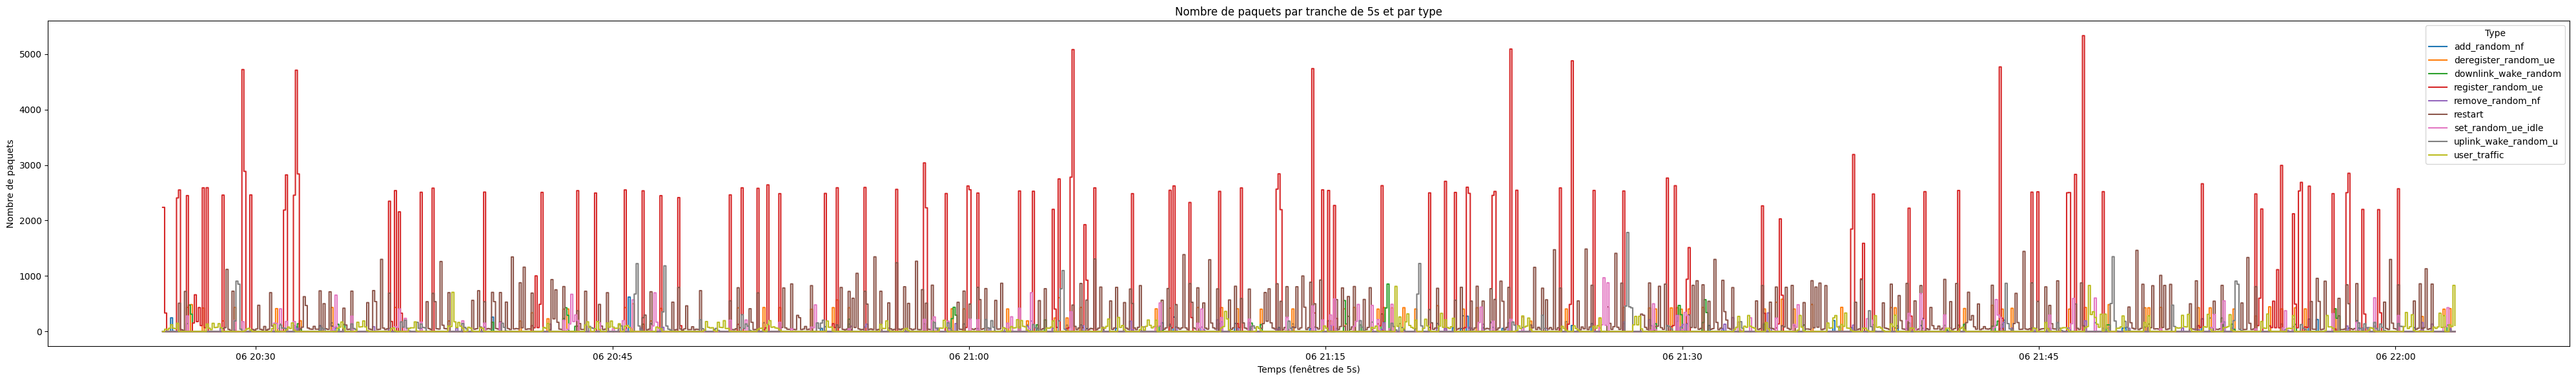

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir ts en datetime
stat_prev_df["ts"] = stat_prev_df["ts"].astype(float)
stat_prev_df["datetime"] = pd.to_datetime(stat_prev_df["ts"], unit="s")

# Trier
stat_prev_df = stat_prev_df.sort_values("ts")

# Calculer nombre de paquets via id
stat_prev_df["packets"] = stat_prev_df["id"].diff().fillna(1).astype(int)
stat_prev_df.loc[stat_prev_df["packets"] <= 0, "packets"] = 1

# Grouper par tranches de 5s et par type uniquement
df_grouped = (
    stat_prev_df.groupby([pd.Grouper(key="datetime", freq="5S"), "type"])["packets"]
    .count()
    .reset_index()
)

# Pivot pour avoir 1 colonne par type
df_pivot = df_grouped.pivot(index="datetime", columns="type", values="packets").fillna(0)

# Étendre l’axe temps pour avoir des 0 explicites quand pas de paquets
full_index = pd.date_range(df_pivot.index.min(), df_pivot.index.max(), freq="5S")
df_pivot = df_pivot.reindex(full_index, fill_value=0)

# Tracer
plt.figure(figsize=(40, 6))
for col in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[col], label=col, drawstyle="steps-post")

plt.xlabel("Temps (fenêtres de 5s)")
plt.ylabel("Nombre de paquets")
plt.title("Nombre de paquets par tranche de 5s et par type")
plt.legend(title="Type")
plt.tight_layout()
plt.show()


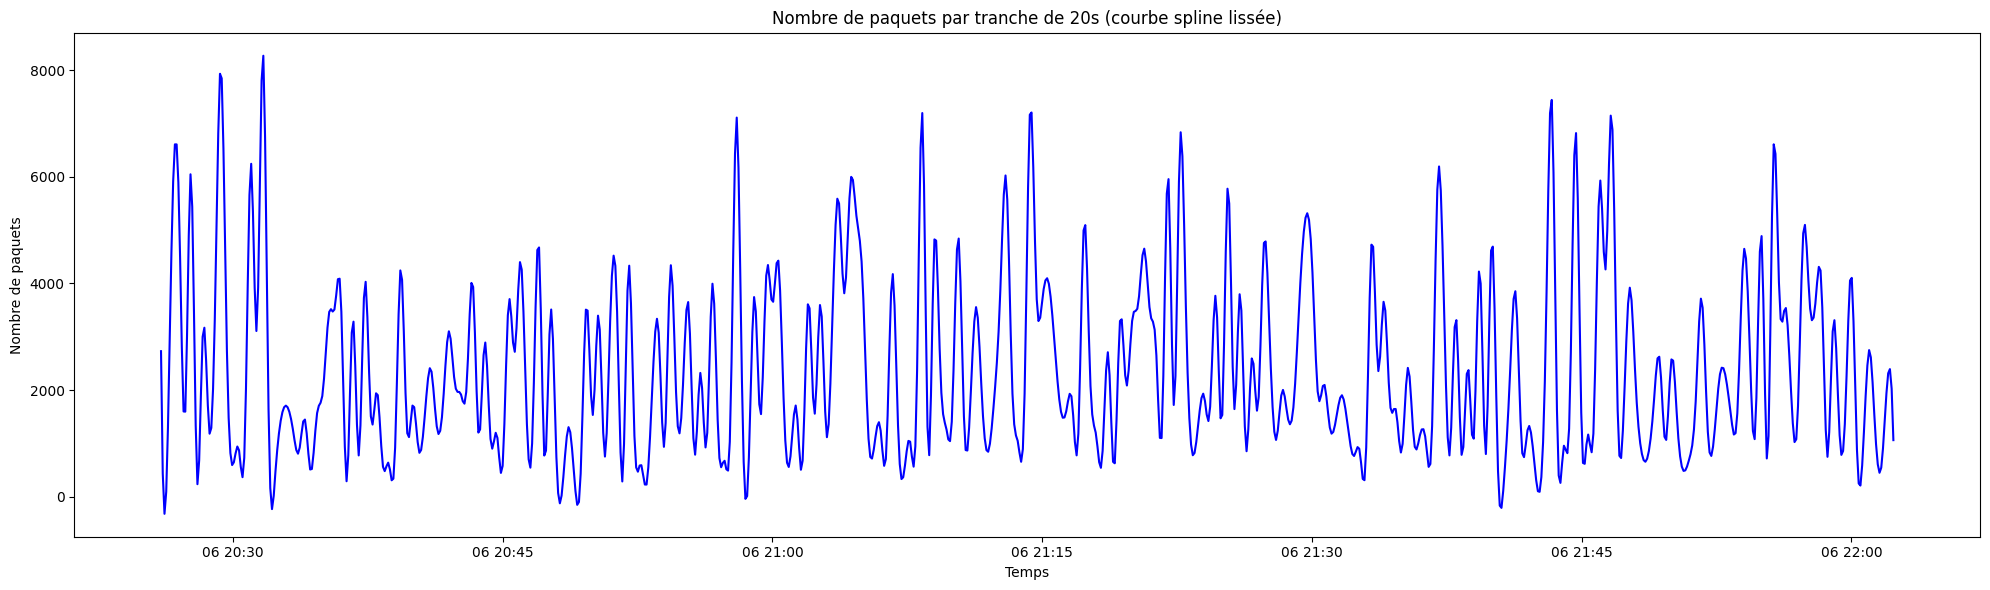

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# Convertir ts en datetime
stat_prev_df["ts"] = stat_prev_df["ts"].astype(float)
stat_prev_df["datetime"] = pd.to_datetime(stat_prev_df["ts"], unit="s")

# Trier par temps
stat_prev_df = stat_prev_df.sort_values("ts")

# Calculer le nombre de paquets via l'id
stat_prev_df["packets"] = stat_prev_df["id"].diff().fillna(1).astype(int)
stat_prev_df.loc[stat_prev_df["packets"] <= 0, "packets"] = 1

# Grouper par tranches de 20 secondes (comme dans ton code)
df_grouped = stat_prev_df.groupby(pd.Grouper(key="datetime", freq="20s"))["packets"].sum().reset_index()

# Identifier les changements de type
stat_prev_df["type_change"] = stat_prev_df["type"] != stat_prev_df["type"].shift(1)
type_change_times = stat_prev_df.loc[stat_prev_df["type_change"], "datetime"].values

# === Création de la spline pour lisser la courbe ===
# Convertir les datetime en nombres pour l'interpolation
x = df_grouped["datetime"].map(pd.Timestamp.timestamp).values  # en secondes
y = df_grouped["packets"].values

# Créer un spline lisse (s paramètre de lissage)
spline = UnivariateSpline(x, y, s=0.5 * np.sum(y))  # ajuste s pour le degré de lissage

# Générer des points plus nombreux pour avoir une courbe continue
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Convertir les timestamps lissés en datetime pour matplotlib
x_smooth_datetime = pd.to_datetime(x_smooth, unit='s')

# Tracer
plt.figure(figsize=(20, 6))
plt.plot(x_smooth_datetime, y_smooth, label="Paquets lissés", color="blue")

plt.xlabel("Temps")
plt.ylabel("Nombre de paquets")
plt.title("Nombre de paquets par tranche de 20s (courbe spline lissée)")
plt.tight_layout()
plt.show()


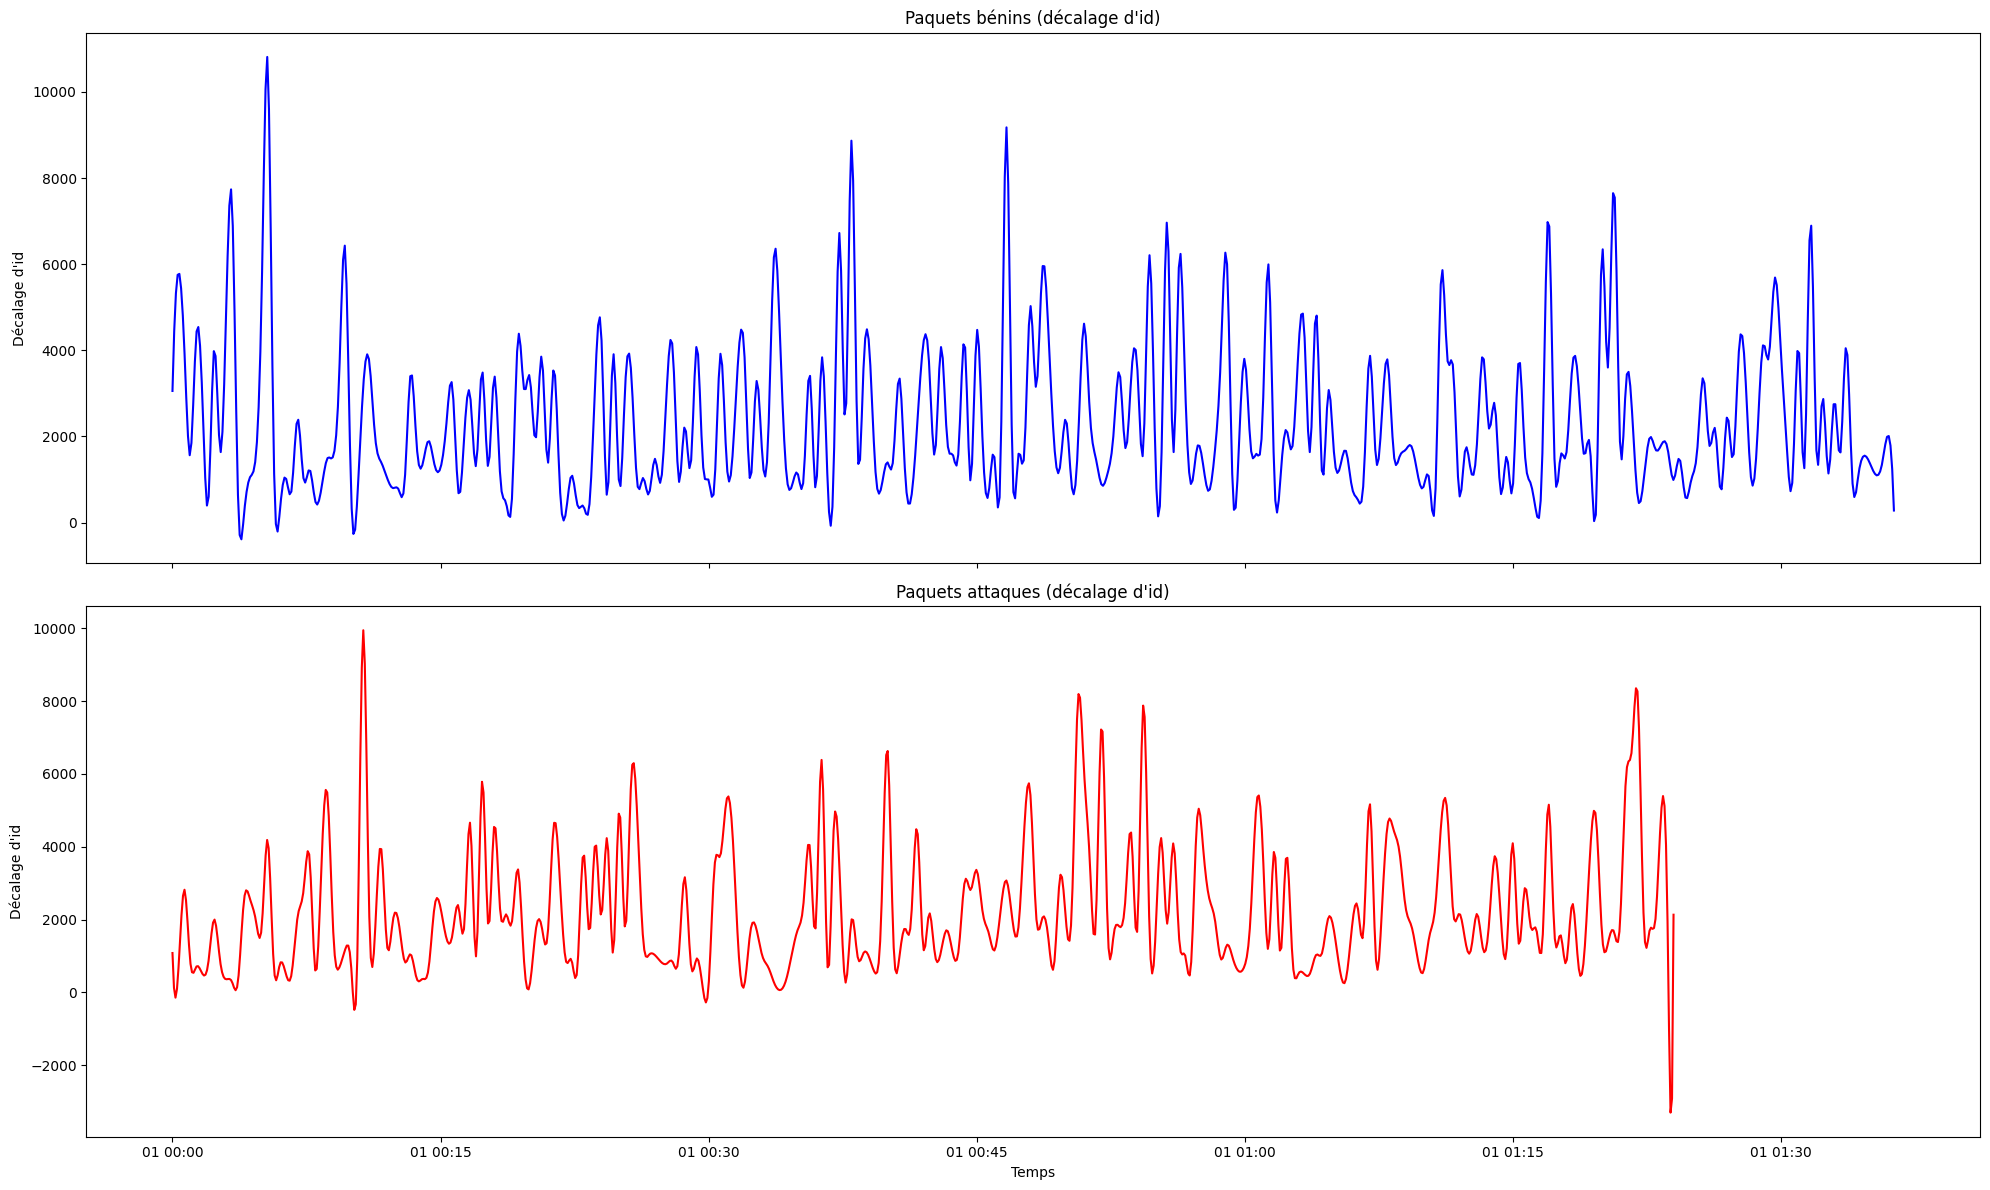

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

# --- Données bénignes ---
benign_df = pd.read_csv('./stat/benign_original (1).csv')
benign_df["ts"] = benign_df["ts"].astype(float)
benign_df["datetime"] = pd.to_datetime(benign_df["ts"], unit="s")

# Décalage d'id (nombre de paquets entre deux lignes)
benign_df["delta"] = pd.to_timedelta(benign_df["ts"] - benign_df["ts"].min(), unit='s')

# Grouper par tranche de 20s et sommer les deltas
benign_df["packets"] = benign_df["id"].diff().fillna(1).astype(int)
benign_grouped = benign_df.groupby(pd.Grouper(key="delta", freq="20s"))["packets"].sum().reset_index()

# --- Données attaques ---
attack_df = pd.read_csv('./stat/both_original (1).csv')
attack_df["ts"] = attack_df["ts"].astype(float)
attack_df["datetime"] = pd.to_datetime(attack_df["ts"], unit="s")

attack_df["delta"] = pd.to_timedelta(attack_df["ts"] - attack_df["ts"].min(), unit='s')
attack_df["packets"] = attack_df["id"].diff().fillna(1).astype(int)
attack_grouped = attack_df.groupby(pd.Grouper(key="delta", freq="20s"))["packets"].sum().reset_index()

# --- Spline pour lisser la courbe ---
x_b = benign_grouped["delta"].dt.total_seconds().values
y_b = benign_grouped["packets"].values
spline_b = UnivariateSpline(x_b, y_b, s=0.5 * np.sum(y_b))
x_smooth_b = np.linspace(x_b.min(), x_b.max(), 1000)
y_smooth_b = spline_b(x_smooth_b)
x_smooth_b_dt = pd.to_datetime(x_smooth_b, unit='s')

x_a = attack_grouped["delta"].dt.total_seconds().values
y_a = attack_grouped["packets"].values
spline_a = UnivariateSpline(x_a, y_a, s=0.5 * np.sum(y_a))
x_smooth_a = np.linspace(x_a.min(), x_a.max(), 1000)
y_smooth_a = spline_a(x_smooth_a)
x_smooth_a_dt = pd.to_datetime(x_smooth_a, unit='s')

# --- Tracé ---
fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

axes[0].plot(x_smooth_b_dt, y_smooth_b, color="blue", label="Décalage bénins")
axes[0].set_ylabel("Décalage d'id")
axes[0].set_title("Paquets bénins (décalage d'id)")

axes[1].plot(x_smooth_a_dt, y_smooth_a, color="red", label="Décalage attaques")
axes[1].set_xlabel("Temps")
axes[1].set_ylabel("Décalage d'id")
axes[1].set_title("Paquets attaques (décalage d'id)")

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

# Exemple : DataFrame avec une colonne timestamp
df = pd.DataFrame({
    "timestamp": [1751833569.357074, 1751833570.123456, 1751833580.987654]
})

# Convertir en datetime si nécessaire
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Recalculer comme décalage par rapport au minimum
df["delta_time"] = df["timestamp"] - df["timestamp"].min()

# Si tu veux en secondes (float)
df["delta_seconds"] = df["delta_time"].dt.total_seconds()

print(df)


                      timestamp                delta_time  delta_seconds
0 2025-07-06 20:26:09.357074022           0 days 00:00:00       0.000000
1 2025-07-06 20:26:10.123456001 0 days 00:00:00.766381979       0.766382
2 2025-07-06 20:26:20.987653971 0 days 00:00:11.630579949      11.630580


In [65]:
import re

import networkx as nx
import numpy as np
import torch
import torch.nn.functional as F
import tqdm
from sklearn.mixture import GaussianMixture
import random

N_COMPONENTS = 17 # TEMPORAIRE, à déterminer

def init_gmm(float_encountered: list[float]):
    global gmm  # noqa: PLW0603
    gmm = GaussianMixture(n_components=N_COMPONENTS)
    data = np.array(float_encountered).reshape(-1,1)
    gmm.fit(data)

random_floats = [random.uniform(0, 10) for _ in range(100)]
init_gmm(random_floats)

label_to_array = np.array([[5.0]])
prediction     = gmm.predict(label_to_array)
print(random_floats)
prediction

[0.31173799891363707, 8.501380974149313, 8.817082243563544, 3.6055123757246967, 1.9796369515811074, 4.009321700001241, 5.3800621397152915, 9.24797789973704, 3.6818535427297263, 9.945920401894346, 0.49994658472847564, 1.8051546819048303, 7.149180806350879, 3.6333658441627668, 4.82129961915093, 2.2391401885433226, 4.712179606621184, 9.3214209840783, 7.136943383738616, 6.276996732632666, 1.0749938965095385, 9.867629582243222, 4.2248674158319846, 2.9227846202864805, 6.684944468999081, 4.886833927912048, 5.466541480670067, 5.784036524000263, 1.449226346778657, 0.06850698438129466, 3.5641326438905105, 3.565298694924106, 3.5155243353906283, 7.265954563913213, 9.3020852047443, 9.623808844690696, 7.825606729249497, 5.9911206575943785, 1.7250346032289388, 5.951216396350202, 8.503883076242607, 4.977277380626909, 0.5278870897909405, 8.017155137011141, 9.976394334393383, 8.020078008356654, 9.55970929622246, 9.609472197525013, 9.93202825113196, 0.4680197442202372, 2.0246438626113905, 8.0424157810971

array([4], dtype=int64)

In [25]:
prediction

array([2], dtype=int64)

In [ ]:
import torch

# Convert GMM prediction to one-hot encoding
one_hot_tensor = torch.zeros(N_COMPONENTS, dtype=torch.int)
one_hot_tensor[prediction[0]] = 1
print(one_hot_tensor)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [24]:
list(range(1,18))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [1]:
import pickle

with open('../data/pre_process/graph_construction/benign.pkl', 'rb') as f:
    graphs = pickle.load(f)
print(graphs)

Graph with 1951 nodes and 7517 edges


In [8]:
a = [attr for n, attr in graphs.nodes(data=True) if "{" in attr.get("label")]
a

[{'label': "{'per.extension_bit': 'False', 'per.choice_index': 0, 'NGAP_PDU': 0, 'initiatingMessage_element': 'initiatingMessage', 'procedureCode': 10, 'per.enum_index': 0, 'criticality': 0, 'per.open_type_length': 10, 'value_element': 'value', 'UEContextReleaseRequest_element': 'UEContextReleaseRequest', 'per.sequence_of_length': 10, 'protocolIEs': 10, 'ProtocolIE_Field_element': 'ProtocolIE-Field', 'id': 10, 'AMF_UE_NGAP_ID': 6, 'RAN_UE_NGAP_ID': 6, 'PDUSessionResourceListCxtRelReq': 0, 'PDUSessionResourceItemCxtRelReq_element': 'PDUSessionResourceItemCxtRelReq', 'per.optional_field_bit': 'False', 'pDUSessionID': 0, 'Cause': 0, 'per.extension_present_bit': 'False', 'radioNetwork': 0}",
  'node_type': 2,
  'packet_id': 0},
 {'label': "{'method': 'POST', 'path': '/oauth2/token', 'stream_id': 0}",
  'node_type': 2,
  'packet_id': 1},
 {'label': "{'status': 7, 'stream_id': 0}", 'node_type': 2, 'packet_id': 2},
 {'label': "{'token_type': 'Bearer', 'expires_in': 5, 'scope': 'nsmf-pdusessio

In [3]:
# Trouver les noeuds avec label == 0
nodes_with_label_0 = [n for n, attr in graphs.nodes(data=True) if attr.get("label") == "0"]

# Trouver les arcs liés à ces noeuds
edges_linked = [
    (u, v, d) for u, v, d in graphs.edges(data=True)
    if u in nodes_with_label_0 or v in nodes_with_label_0
]

print("Noeuds avec label 0 :", nodes_with_label_0)
print("Arcs liés :", edges_linked)

Noeuds avec label 0 : [19]
Arcs liés : [(18, 19, {'label': 'http2[0].ngApCause.value'}), (19, 34, {'label': 'http2[0].ngApCause.value'}), (19, 48, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 126, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 167, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 184, {'label': 'http2[0].multipleUnitUsage[0].usedUnitContainer[0].localSequenceNumber'}), (19, 187, {'label': 'http2[0].invocationSequenceNumber'}), (19, 404, {'label': 'http2[0].multipleUnitUsage[1].usedUnitContainer[0].localSequenceNumber'}), (19, 675, {'label': 'http2[0].invocationSequenceNumber'}), (19, 677, {'label': 'http2[0].invocationSequenceNumber'}), (19, 854, {'label': 'http2[0].multipleUnitUsage[0].usedUnitContainer[0].localSequenceNumber'})]


In [6]:
unique_labels = set()
for _, _, edge_data in graphs[0].edges(data=True):
    if "label" in edge_data:
        unique_labels.add(edge_data["label"])
unique_labels = list(unique_labels)
print(unique_labels)

['http2[0].target-plmn-list[0].mcc', 'pfcp[0].pfcp.pdn_type', 'http2[0].pccRules.PccRuleId-1.precedence', 'ngap[0].ngap.sST', 'ngap[0].nas-5gs.spare_half_octet', 'ngap[0].ngap.qosFlowLevelQosParameters_element', 'http2[0].tai.plmnId.mnc', 'ngap[0].per.optional_field_bit', 'ngap[1].per.optional_field_bit', 'http2[0].jwt.exp', 'http2[0].individualSmSubsData[0].dnnConfigurations.internet.sessionAmbr.downlink', 'http2[0].plmn-id.mcc', 'http2[0].pDUSessionChargingInformation.pduSessionInformation.networkSlicingInfo.sNSSAI.sd', 'http2[0].singleNssai.sd', 'pfcp[0].pfcp.dl_mbr', 'http2[0].upCnxState', 'http2[0].policyCtrlReqTriggers[7]', 'http2[0].nfInstances[1].nfServices[4].nfServiceStatus', 'http2[0].tai.plmnId.mcc', 'ngap[0].ngap.fiveG_TMSI', 'http2[0].method', 'ngap[0].nas-5gs.seq_no', 'http2[0].pccRules.PccRuleId-1.flowInfos[0].flowDirection', 'http2[0].policyCtrlReqTriggers[5]', 'http2[0].invocationTimeStamp', 'ngap[0].nas-5gs.security_header_type', 'http2[0].notificationUri', 'http2[0]

In [21]:
from torch_geometric.utils import from_networkx
data = from_networkx(graphs[0], group_node_attrs=["embedding"], group_edge_attrs=["embedding"])


ValueError: Not all nodes contain the same attributes

In [ ]:
data

In [7]:
max_packet_id = max(nx.get_node_attributes(graph, "packet_id").values())

subgraph_count = (max_packet_id - 500) // 1000 + 1

subgraphs = []

for i in range(subgraph_count):

    # Get the nodes within the window
    selected_nodes = [
        node for node, attr in graph.nodes(data=True)
        if i*500 <= attr["packet_id"] <= i*500 + 1000
    ]
    subgraph = graph.subgraph(selected_nodes)
    print(subgraph)

Graph with 1554 nodes and 7268 edges


In [2]:
import hashlib
import numpy as np

D = 512
for token in ["toto","titi","toto"]:
    seed = int.from_bytes(hashlib.sha256(token.encode('utf8')).digest()[:8], 'big') % (2**32)
    rng = np.random.RandomState(seed)
    print(token,seed,rng)
    print(rng.randn(D).astype(np.float32)[:3])


toto 827688620 RandomState(MT19937)
[-0.06007909 -0.7802831   0.5533297 ]
titi 3032597917 RandomState(MT19937)
[ 1.5279652  0.2223371 -1.4584956]
toto 827688620 RandomState(MT19937)
[-0.06007909 -0.7802831   0.5533297 ]


In [9]:
graph[0]

AtlasView({1: {'label': 'ip_src'}, 2: {'label': 'ip_dst'}, 3: {'label': 'ngap[0].per.extension_present_bit'}, 4: {'label': 'ngap[0].ngap.radioNetwork'}, 5: {'label': 'ngap[0].ngap.initiatingMessage_element'}, 6: {'label': 'ngap[0].ngap.procedureCode'}, 7: {'label': 'ngap[0].ngap.pDUSessionID'}, 8: {'label': 'ngap[0].per.open_type_length'}, 9: {'label': 'ngap[0].ngap.value_element'}, 10: {'label': 'ngap[0].ngap.UEContextReleaseRequest_element'}, 11: {'label': 'ngap[0].ngap.protocolIEs'}, 12: {'label': 'ngap[0].ngap.ProtocolIE_Field_element'}, 13: {'label': 'ngap[0].ngap.id'}, 14: {'label': 'ngap[0].ngap.RAN_UE_NGAP_ID'}, 15: {'label': 'ngap[0].ngap.PDUSessionResourceListCxtRelReq'}, 16: {'label': 'ngap[0].ngap.PDUSessionResourceItemCxtRelReq_element'}})